In [26]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests
from scipy import stats
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates

In [2]:
URL = "https://en.wikipedia.org/wiki/Legal_High_(South_Korean_TV_series)"
response = requests.get(URL)
soup = BeautifulSoup(response.content, 'html.parser')

In [3]:
#FINDING DIRECTOR ON WIKIPEDIA
th_tags = soup.find_all('th', {'scope': 'row', 'class': 'infobox-label'}) #find all the tags

for th_tag in th_tags: #loop through until we get the right 'Directed By'
    if th_tag.text.strip() == "Directed by":
        # Use find_next_sibling to get the next <td> tag
        director = th_tag.find_next_sibling('td', {'class': 'infobox-data attendee'})
        

In [4]:
all_tables = soup.find_all('table', {'wikitable'})

desired_table = None
for table in all_tables:
    caption = table.find('caption')
    if caption and "Average TV viewership ratings" in caption.get_text():
        desired_table = table
        break
        

In [5]:
tv_dataframes=pd.read_html(str(desired_table))
ratings_table = tv_dataframes[0]
ratings_table.columns = ratings_table.columns.get_level_values(1)
ratings_table = ratings_table[['Ep.', 'Original broadcast date', 'Nationwide']]
ratings_table.columns = ['Episode Number', 'Broadcast Date', 'Nielson Nationwide Rating']

In [6]:
ratings_table = ratings_table.iloc[:-2]
ratings_table['Broadcast Date'] = pd.to_datetime(ratings_table['Broadcast Date']) # turns into date-time object
ratings_table['Nielson Nationwide Rating'] = ratings_table['Nielson Nationwide Rating'].str.rstrip('%').astype('float') / 100.0

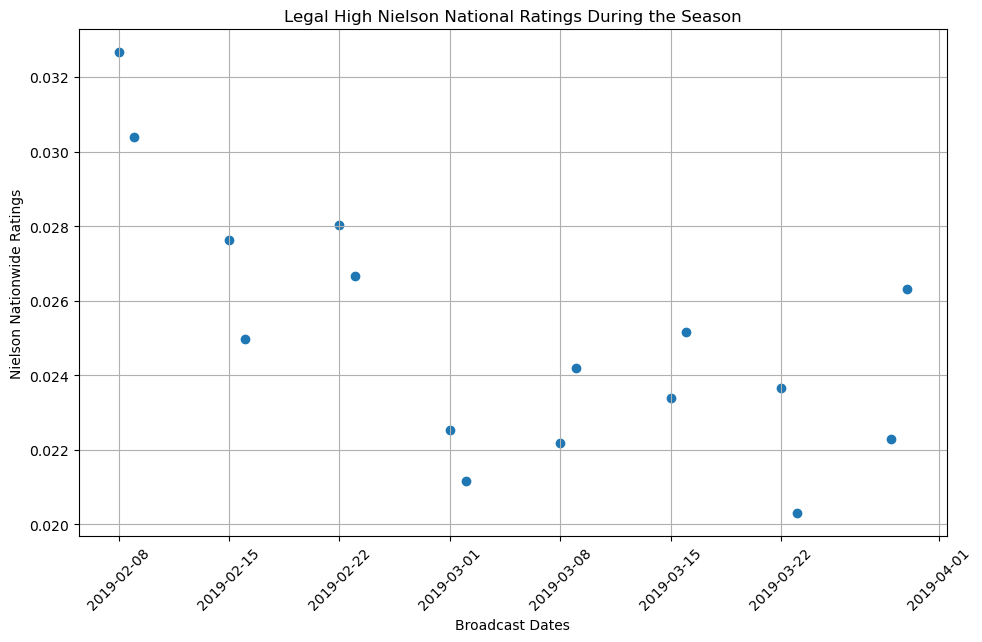

In [35]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(ratings_table['Broadcast Date'], ratings_table['Nielson Nationwide Rating'], marker='o')
plt.title('Legal High Nielson National Ratings During the Season')
plt.xlabel('Broadcast Dates')
plt.ylabel('Nielson Nationwide Ratings')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.savefig("Legal High Episode Ratings Scatter Plot", bbox_inches="tight")
plt.show()

slope:-0.00013615776699029124
intercept:2.470487870145631
R:-0.6677577645327699
R^2:0.4459004320938022
p-value:0.004702578223321684
std err:4.056517572131609e-05


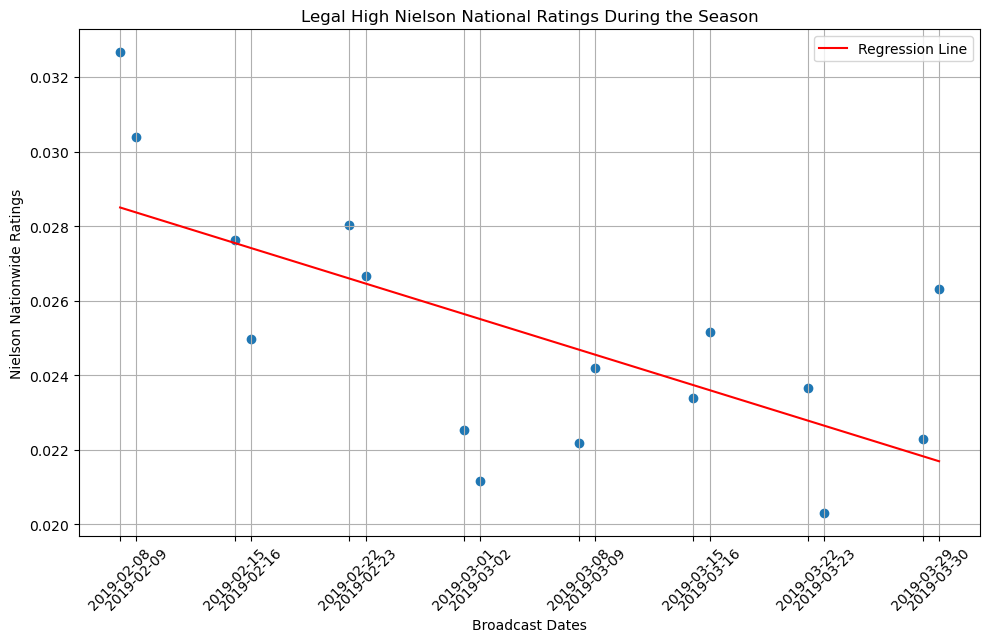

In [34]:
# Plotting
plt.figure(figsize=(10, 6))
x = np.array([mdates.date2num(date) for date in ratings_table['Broadcast Date']])
plt.scatter(x, ratings_table['Nielson Nationwide Rating'])
slope, intercept, r_value, p_value, std_err = stats.linregress(x, ratings_table['Nielson Nationwide Rating'])
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"R:{r_value}")
print(f"R^2:{r_value ** 2}")
print(f"p-value:{p_value}")
print(f"std err:{std_err}")
y_pred = slope * x + intercept

plt.plot(x, y_pred, label='Regression Line', color='r')

plt.title('Legal High Nielson National Ratings During the Season')
plt.xlabel('Broadcast Dates')
plt.ylabel('Nielson Nationwide Ratings')
plt.grid(True)
plt.tight_layout()

# Create a date formatter to display only the date part
date_format = mdates.DateFormatter('%Y-%m-%d')

# Set the x-axis ticks and labels to be 'Broadcast Date' values with only the date part
plt.xticks(x, ratings_table['Broadcast Date'], rotation=45)
plt.gca().xaxis.set_major_formatter(date_format)

plt.legend()
plt.savefig("Legal High Episode Ratings Regression.png", bbox_inches="tight")
plt.show()

In [37]:
ratings_table

,Episode Number,Broadcast Date,Nielson Nationwide Rating
0,1,2019-02-08,0.03266
1,2,2019-02-09,0.03038
2,3,2019-02-15,0.02762
3,4,2019-02-16,0.02497
4,5,2019-02-22,0.02804
5,6,2019-02-23,0.02666
6,7,2019-03-01,0.02253
7,8,2019-03-02,0.02115
8,9,2019-03-08,0.02218
9,10,2019-03-09,0.02418
